In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1084]:
s = ! cat ../../experiments/exp-38/desc
d = eval(s[0])

In [1085]:
d

{'T': 2.0,
 'batch_size': 100,
 'data': 'cifar10',
 'decay_rate': 0.9,
 'decay_step': 1000,
 'ensemble_step': -1,
 'eval_frequency': 500,
 'go_deeper': False,
 'langevin': False,
 'log_frequency': 10,
 'lr': 0.001,
 'lr_strategy': 'linear',
 'lr_to0_from': 100,
 'make_sgld_target': False,
 'n_epochs': 400,
 'noise_ratio': 2.0,
 'reg': 1.0,
 's_model': 'no',
 's_step': 1,
 's_vggsize': 1.0,
 'save_model_frequency': 500,
 'sgld_target': False,
 'start_snn': 0,
 'start_snn2': 0,
 't_model': 'vgg16-like',
 't_vggsize': 1.0,
 'train_bn': True,
 'train_dir': '../../experiments/exp-38'}

In [1049]:
import argparse

In [1050]:
FLAGS = argparse.Namespace(**d)

In [1052]:
n_iter_to_train = FLAGS.n_epochs * 50000 / FLAGS.batch_size
n_iter_per_epoch = 50000 / FLAGS.batch_size

In [1071]:
FLAGS.lr * (n_iter_to_train - 500 * 190) / (n_iter_to_train - FLAGS.lr_to0_from * n_iter_per_epoch)

0.0001

In [1060]:
50000 / 100 

500

In [994]:
! ls -lt ../../experiments/exp*/*test_eval_logs.csv | head

-rw-rw-r-- 1 ashuha ashuha 41368 Май 25 16:22 ../../experiments/exp-30/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 17014 Май 25 16:22 ../../experiments/exp-32/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha  2285 Май 25 16:21 ../../experiments/exp-33/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 73864 Май 25 04:30 ../../experiments/exp-27/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 43334 Май 25 01:37 ../../experiments/exp-24/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha    93 Май 25 01:32 ../../experiments/exp-31/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 92565 Май 24 08:13 ../../experiments/exp-sgld-4/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 35968 Май 24 06:52 ../../experiments/exp-28/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha  6020 Май 24 02:27 ../../experiments/exp-29/my_test_eval_logs.csv
-rw-rw-r-- 1 ashuha ashuha 54840 Май 23 20:58 ../../experiments/exp-26/my_test_eval_logs.csv


In [942]:
base = '../../experiments/exp-15////'
df_eval = pd.read_csv(base + '/my_eval_logs.csv', index_col='step')
df_train = pd.read_csv(base + '/my_train_logs.csv', index_col='step')

In [945]:
df_eval[df_eval.index > 10000].columns

Index([u'epoch', u't_train_acc', u't_test_acc', u's_train_acc', u's_test_acc',
       u'ensemble_test_acc', u'Deep-SNN_test_acc'],
      dtype='object')

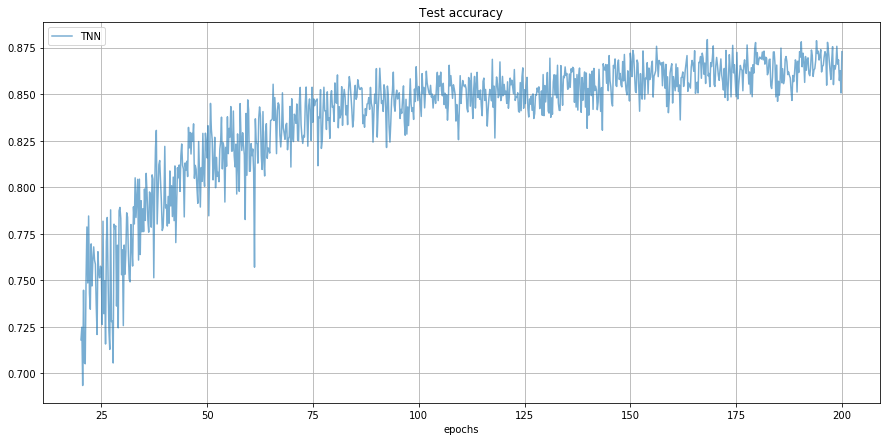

In [1091]:
base = '../../experiments/exp-40/'
df_eval = pd.read_csv(base + '/my_test_eval_logs.csv', index_col='step')
df_train = pd.read_csv(base + '/my_train_logs.csv', index_col='step')
# df_eval = df_eval[df_eval.index < 20000]
k = 100
df = df_eval[k:]
plt.figure(figsize=(15, 7))
plt.title('Test accuracy')
# plt.plot(df_eval.index[k:] / 500., df_eval['s_test_acc'][k:], alpha=.6, label='SNN')
plt.plot(df_eval.index[k:] / 500., df_eval['t_test_acc'][k:], alpha=.6, label='TNN')
# plt.plot(df_eval.index[k:] / 500., df_eval['ensemble_test_acc'][k:], label='Ensemble')
# plt.plot(df_eval.index[k:] / 500., df_eval['Deep-SNN_test_acc'][k:], label='Ensemble-SNN')


# plt.axhline(0.87, c='orange', linestyle='--', alpha=.7, label='0.87')
# plt.axhline(0.9, c='blue', linestyle='--', alpha=.7, label='0.9')
plt.xlabel('epochs')
plt.legend()
plt.grid()

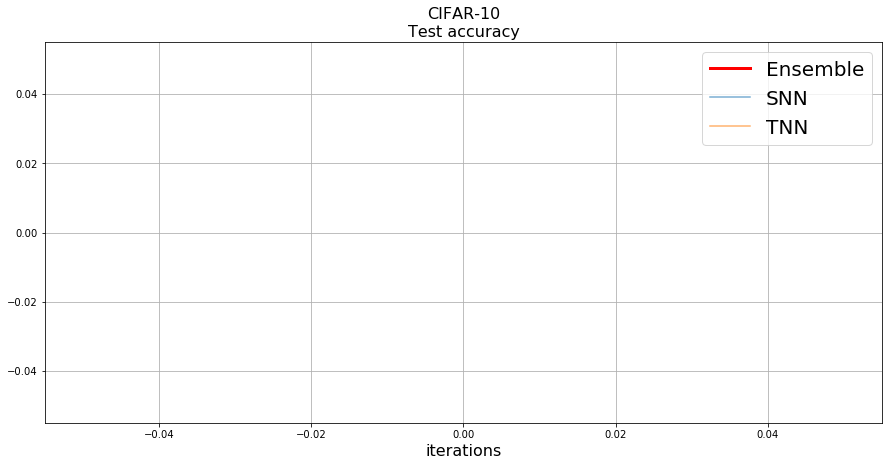

In [1039]:
k = 500
plt.figure(figsize=(15, 7))
plt.title('CIFAR-10\nTest accuracy', size=16)
plt.plot(df_eval['ensemble_test_acc'][k:], 'r', label='Ensemble', linewidth=3)
plt.plot(df_eval['s_test_acc'][k:], alpha=.6, label='SNN')
plt.plot(df_eval['t_test_acc'][k:], alpha=.6, label='TNN')
# plt.plot(df_eval['ensembleSNN_test_acc'][k:], label='Ensemble-SNN')
# plt.axhline(0.87, c='orange', linestyle='--', alpha=.7, label='0.87')
# plt.axhline(0.9, c='blue', linestyle='--', alpha=.7, label='0.9')
plt.xlabel('iterations', size=16)
plt.legend(prop={'size':20})
plt.grid()

In [765]:
def ma(a, m=5):
    ans = 0
    for i in range(m):
        ans += a[i:-m+i]
    return ans / m

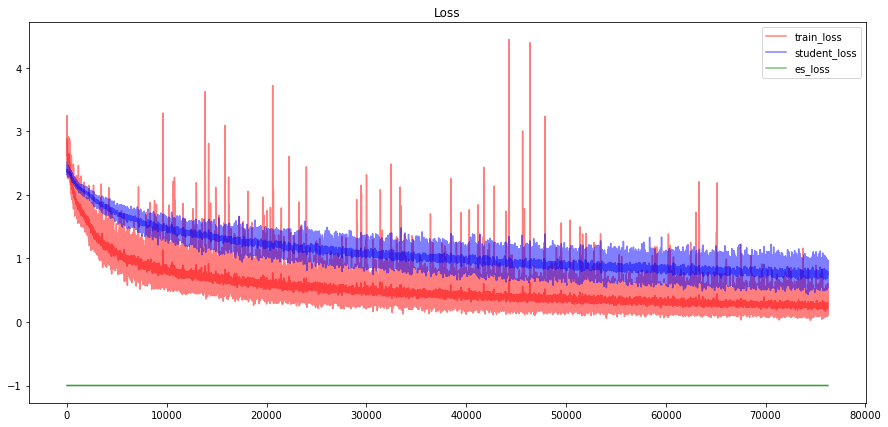

In [750]:
plt.figure(figsize=(15, 7))
plt.title('Loss')
plt.plot(df_train['train_loss'], c='r', alpha=.5)
plt.plot(ma(df_train['train_loss'].values, m=20), c='r', alpha=.5)

plt.plot(df_train['student_loss'], c='b', alpha=.5)
plt.plot(ma(df_train['student_loss'].values, m=20), c='b', alpha=.5)

plt.plot(df_train['es_loss'], c='g', alpha=.5)
plt.plot(ma(df_train['es_loss'].values, m=20), c='g', alpha=.5)

plt.legend()

In [588]:
def unpickle(fname):
    import cPickle
    with open(fname, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [71]:
with open('/tmp/cifar10_data/cifar-10-batches-bin/data_batch_1.bin', 'rb') as f:
    datadict = pickle.load(f)
    Y = np.array(datadict['labels'])
    X = datadict['data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")

UnpicklingError: invalid load key, ''.

In [3]:
! pwd

/home/ashuha/atanov/langevin/cifar10


In [421]:
base = '../../experiments/exp-15/'
imgs = np.load(base + 'miss-imgs1.npy')
labels = np.load(base + 'miss-labels1.npy')
t_logits = np.load(base + 'miss-t_logits1.npy')
s_logits = np.load(base + 'miss-s_logits1.npy')

i = 2
while True:
    try:
        imgs = np.concatenate((np.load(base + '/miss-imgs{}.npy'.format(i)), imgs))
        labels = np.concatenate((np.load(base + '/miss-labels{}.npy'.format(i)), labels))
        t_logits = np.concatenate((np.load(base + '/miss-t_logits{}.npy'.format(i)), t_logits))
        s_logits = np.concatenate((np.load(base + '/miss-s_logits{}.npy'.format(i)), s_logits))
    except:
        break
    i += 1

In [422]:
t_labels = t_logits.argmax(axis=1)
s_labels = s_logits.argmax(axis=1)

In [423]:
s_logits

array([[ -7.22989416, -10.66052246,  -2.31416368, ...,   2.36009145,
        -10.51685429,  -9.7632513 ],
       [  4.29874611,  -4.37913275,  -1.40144289, ...,  -8.28203201,
          1.4554559 ,  -7.74833488],
       [  3.47244   ,  -6.48784685,  -4.15085077, ...,  -9.77502251,
          5.68496227,  -8.23659897],
       ..., 
       [ -7.71415091, -12.19662189,  -4.36740541, ...,  -6.37766647,
         -7.1870985 ,  -9.21873856],
       [ -8.74685383, -11.59918213,  -4.32470942, ...,  -5.79750013,
         -7.77625704,  -9.33539772],
       [ -8.37508011, -12.8504734 ,  -6.87322807, ...,   3.81362605,
        -13.06340885, -11.10268688]], dtype=float32)

In [565]:
sgld_l = np.load('../../experiments/exp-sgld-target-1/ensemble-train-logits.npy')

In [567]:
def get_prob(logits, t = 1):
    return np.exp(logits / t) / np.exp(logits/t).sum(axis=1)[:,np.newaxis]

In [568]:
sgld_p = get_prob(sgld_l)

In [572]:
y_noise = np.load('/home/ashuha/atanov/data/cifar-10-noise-labels.npy')

In [579]:
y_noise[4]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

<Container object of 10 artists>

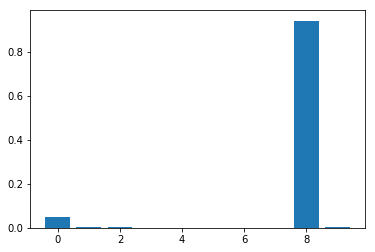

In [602]:
plt.bar(range(10), sgld_p[-15])

In [425]:
t = 4
p = np.exp(s_logits / t) / np.exp(s_logits/t).sum(axis=1)[:,np.newaxis]

In [426]:
lton = "airplane automobile bird cat deer dog frog horse ship truck".split()

In [282]:
def rescale_img(img):
    t = img * 127. / max(np.max(img), -np.min(img)) + 127
    return t/255.

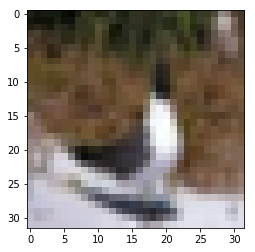

In [428]:
plt.imshow((imgs[i]))

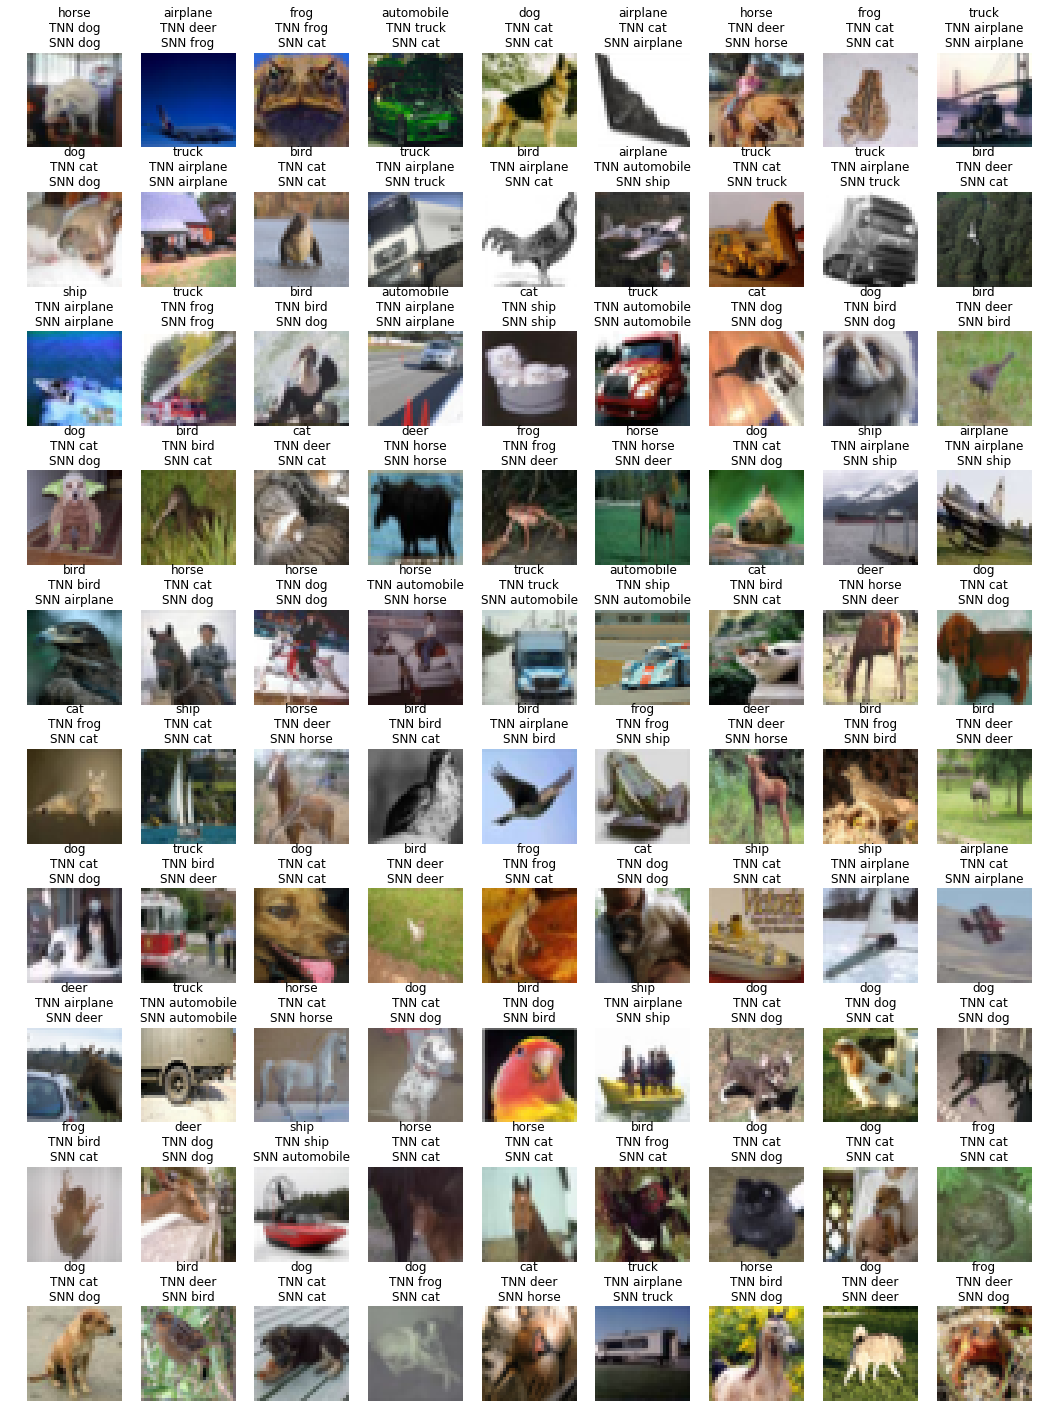

In [433]:
lton = "airplane automobile bird cat deer dog frog horse ship truck".split()
plt.figure(figsize=(18,38))
for i in range(90, 180):
    plt.subplot(15, 9, i - 90 + 1)
    plt.axis('off')
    plt.imshow(imgs[i])
    plt.title("{}\nTNN {}\nSNN {}".format(lton[labels[i]], lton[t_labels[i]], lton[s_labels[i]]))

In [32]:
l = np.load('exp-0/logits_300.npy')
l /= 2.

IOError: [Errno 2] No such file or directory: 'exp-0/logits_300.npy'

In [289]:
p = np.exp(l) / np.exp(l).sum(axis=1)[:,np.newaxis]

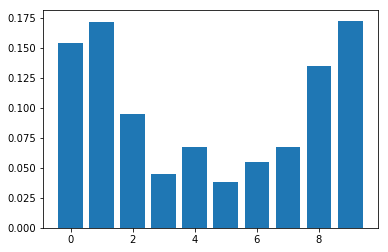

In [290]:
plt.bar(np.arange(10), p[20]);

In [78]:
class ZCA(object):
    def __init__(self, regularization=1e-5, x=None):
        self.regularization = regularization
        if x is not None:
            self.fit(x)

    def fit(self, x):
        s = x.shape
        x = x.copy().reshape((s[0], np.prod(s[1:])))
        m = np.mean(x, axis=0)
        x -= m
        sigma = np.dot(x.T, x) / x.shape[0]
        U, S, V = np.linalg.svd(sigma)
        tmp = np.dot(U, np.diag(1. / np.sqrt(S + self.regularization)))
        tmp2 = np.dot(U, np.diag(np.sqrt(S + self.regularization)))
        self.ZCA_mat = np.dot(tmp, U.T)
        self.inv_ZCA_mat = np.dot(tmp2, U.T)
        self.mean = m.copy()

    def apply(self, x):
        s = x.shape
        if isinstance(x, np.ndarray):
            return np.dot(x.reshape((s[0], np.prod(s[1:]))) - self.mean, self.ZCA_mat).reshape(
                s)
        else:
            raise NotImplementedError("Whitening only implemented for numpy arrays or Theano TensorVariables")

    def invert(self, x):
        s = x.shape
        if isinstance(x, np.ndarray):
            return (
            np.dot(x.reshape((s[0], np.prod(s[1:]))), self.inv_ZCA_mat.get_value()) + self.mean.get_value()).reshape(s)
        else:
            raise NotImplementedError("Whitening only implemented for numpy arrays or Theano TensorVariables")


In [76]:
import os
import cPickle as pickle
from sklearn.preprocessing import OneHotEncoder

def load_cifar10(base='/home/ashuha/atanov/data/'):
    def load_CIFAR_batch(filename):
        with open(filename, 'rb') as f:
            datadict = pickle.load(f)
            Y = np.array(datadict['labels'])
            X = datadict['data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
            return X / 255., Y

    def load_CIFAR10(ROOT):
        xs, ys = [], []
        for b in range(1, 6):
            f = os.path.join(ROOT, 'data_batch_%d' % (b,))
            X, Y = load_CIFAR_batch(f)
            xs.append(X)
            ys.append(Y)
        Xtr, Ytr = np.concatenate(xs), np.concatenate(ys)
        del X, Y
        Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
        return Xtr, Ytr, Xte, Yte

    # Load the raw CIFAR-10 data
    cifar10_dir = os.path.join(base, 'cifar-10-batches-py')
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Normalize the data: subtract the mean image
    whitener = ZCA(x=X_train)
    X_train = whitener.apply(X_train)
    X_test = whitener.apply(X_test)

    # Transpose so that channels come first
    # X_train = X_train.transpose(0, 3, 1, 2).copy()
    # X_test = X_test.transpose(0, 3, 1, 2).copy()

    enc = OneHotEncoder()
    enc.fit(y_train[:,np.newaxis])
    y_train = enc.transform(y_train[:,np.newaxis])
    y_test = enc.transform(y_test[:,np.newaxis])

    return (X_train, y_train, X_test, y_test), X_train.shape[0], X_test.shape[0], (None, 32, 32, 3), 10



In [9]:
d[0][0][0].shape

(32, 32, 3)

In [434]:
plt.imshow(rescale_img(X_train[63]))

NameError: name 'X_train' is not defined

In [79]:
data, train_size, test_size, input_shape, nclass = load_cifar10()
[X_train, y_train, X_test, y_test] = data


In [62]:
import random

def batch_iterator_train_crop_flip(data, y, batchsize, shuffle=False):
    PIXELS = 32
    PAD_CROP = 4
    n_samples = data.shape[0]
    # Shuffles indicies of training data, so we can draw batches from random indicies instead of shuffling whole data
    indx = np.random.permutation(xrange(n_samples))
    for i in range((n_samples + batchsize - 1) // batchsize):
        sl = slice(i * batchsize, (i + 1) * batchsize)
        X_batch = data[indx[sl]]
        y_batch = y[indx[sl]]

        # pad and crop settings
        trans_1 = random.randint(0, (PAD_CROP*2))
        trans_2 = random.randint(0, (PAD_CROP*2))
        crop_x1 = trans_1
        crop_x2 = (PIXELS + trans_1)
        crop_y1 = trans_2
        crop_y2 = (PIXELS + trans_2)

        # flip left-right choice
        flip_lr = 1#random.randint(0,1)

        # set empty copy to hold augmented images so that we don't overwrite
        X_batch_aug = np.copy(X_batch)

        # for each image in the batch do the augmentation
        for j in range(X_batch.shape[0]):
            # for each image channel
            for k in range(X_batch.shape[-1]):
                # pad and crop images
                img_pad = np.pad(
                    X_batch_aug[j,:,:, k], pad_width=((PAD_CROP, PAD_CROP), (PAD_CROP, PAD_CROP)), mode='constant')
#                 print(X_batch_aug[j,:,:, k].shape, img_pad.shape)
                X_batch_aug[j,:,:,k] = img_pad[crop_x1:crop_x2, crop_y1:crop_y2]

                # flip left-right if chosen
                if flip_lr == 1:
                    X_batch_aug[j,:,:,k] = np.fliplr(X_batch_aug[j,:,:,k])

        # fit model on each batch
        yield X_batch_aug, y_batch


In [65]:
x_batch, y_batch = next(batch_iterator_train_crop_flip(X_train, y_train, 100))

In [67]:
for k in [0, 1 , 2]:
    x_batch[16,:,:,k] = np.fliplr(x_batch[16,:,:,k])

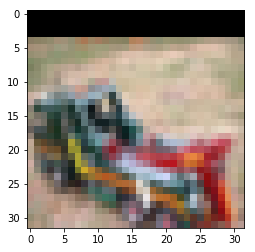

In [68]:
plt.imshow(x_batch[16])

In [61]:
y_batch

<100x10 sparse matrix of type '<type 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [233]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit(y[:,np.newaxis])

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [238]:
enc.transform(y[:,np.newaxis]).argmax(axis=1)

True

In [113]:
d = unpickle('../../data/cifar-10-batches-py/test_batch')

In [239]:
d['labels']

TypeError: tuple indices must be integers, not str

In [100]:
a = np.load('batch.npy')

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

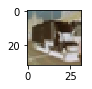

In [102]:
plt.figure(figsize=(1,1))
plt.imshow(a[116][:,:,[2, 1, 0]], interpolation='nearest')

In [21]:
a[5][:,:,[1, 2, 0]].shape

(32, 32, 3)

In [13]:
a[1].shape

(32, 32, 3)